In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,euclidean_distances

In [2]:
df=pd.read_csv('CSV/tmdb_5000_movies.csv')

In [3]:
df.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [4]:
def my_func(k):
    j=json.loads(k)
    s=' '.join(''.join(jj['name'].split()) for jj in j )
    return s

In [5]:
df['genres']=df['genres'].apply(my_func)

In [6]:
df['keywords']=df['keywords'].apply(my_func)

In [7]:
df['string']=df['genres']+' '+df['keywords']
df['string']

0       Action Adventure Fantasy ScienceFiction cultur...
1       Adventure Fantasy Action ocean drugabuse exoti...
2       Action Adventure Crime spy basedonnovel secret...
3       Action Crime Drama Thriller dccomics crimefigh...
4       Action Adventure ScienceFiction basedonnovel m...
                              ...                        
4798    Action Crime Thriller unitedstates–mexicobarri...
4799                                      Comedy Romance 
4800    Comedy Drama Romance TVMovie date loveatfirsts...
4801                                                     
4802      Documentary obsession camcorder crush dreamgirl
Name: string, Length: 4803, dtype: object

In [8]:
X=df['string']

In [9]:
vectorizer=TfidfVectorizer(max_features=2000)

In [10]:
Xtrain=vectorizer.fit_transform(X)

In [11]:
Xtrain

<4803x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 37285 stored elements in Compressed Sparse Row format>

In [13]:
movie2idx=pd.Series(df.index,index=df['title'])

In [17]:
idx=movie2idx['Avatar']

In [20]:
query=Xtrain[idx]
query.toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [30]:
scores=cosine_similarity(query,Xtrain)

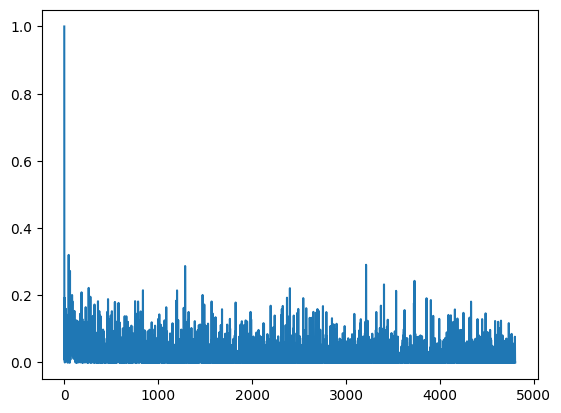

In [32]:
scores=scores.flatten()
plt.plot(scores)

In [33]:
(-scores).argsort()

array([   0,   47, 3214, ..., 2570, 2574, 4802])

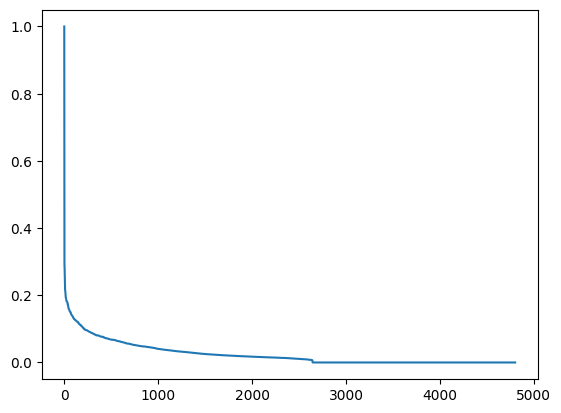

In [35]:
plt.plot(scores[(-scores).argsort()])

In [36]:
recommend_idx=(-scores).argsort()[1:6]

In [38]:
df['title'].iloc[recommend_idx]

47      Star Trek Into Darkness
3214                 Barbarella
1287         A Monster in Paris
61            Jupiter Ascending
3730                      Cargo
Name: title, dtype: object